In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
data = pd.read_csv('/content/dynamic_pricing.csv')
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [ ]:
data.duplicated().value_counts()

,count
False,1000


In [ ]:
data.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
X = data_encoded.drop(columns=['Historical_Cost_of_Ride'])
y = data_encoded['Historical_Cost_of_Ride']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
results = []

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# **model 1: All numerical features without scaling**

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model_1.predict(X_train)
y_test_pred = model_1.predict(X_test)
y_val_pred = model_1.predict(X_val)

results.append({
    'Model': 'Model 1',
    'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
    'Test RMSE': root_mean_squared_error(y_test, y_test_pred),
    'Validation RMSE': root_mean_squared_error(y_val, y_val_pred),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred),
    'Validation R2': r2_score(y_val, y_val_pred),
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Validation MAE': mean_absolute_error(y_val, y_val_pred)
})

# **# Model 2 : All numerical features with Standard Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_train_pred = model_2.predict(X_train_scaled)
y_test_pred = model_2.predict(X_test_scaled)
y_val_pred = model_2.predict(X_val_scaled)

results.append({
    'Model': 'Model 2',
    'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
    'Test RMSE': root_mean_squared_error(y_test, y_test_pred),
    'Validation RMSE': root_mean_squared_error(y_val, y_val_pred),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred),
    'Validation R2': r2_score(y_val, y_val_pred),
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Validation MAE': mean_absolute_error(y_val, y_val_pred)
})

# **Model 3: All numerical features with Standard Scaling + PCA**

In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)


In [ ]:
model_3 = LinearRegression()
model_3.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
y_train_pred = model_3.predict(X_train_pca)
y_test_pred = model_3.predict(X_test_pca)
y_val_pred = model_3.predict(X_val_pca)

results.append({
    'Model': 'Model 3',
    'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
    'Test RMSE': root_mean_squared_error(y_test, y_test_pred),
    'Validation RMSE': root_mean_squared_error(y_val, y_val_pred),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred),
    'Validation R2': r2_score(y_val, y_val_pred),
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Validation MAE': mean_absolute_error(y_val, y_val_pred)
})

In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv('/content/model_results.csv', index=False)

In [ ]:
print("Model evaluation completed. Results saved to 'model_results.csv'.")

Model evaluation completed. Results saved to 'model_results.csv'.


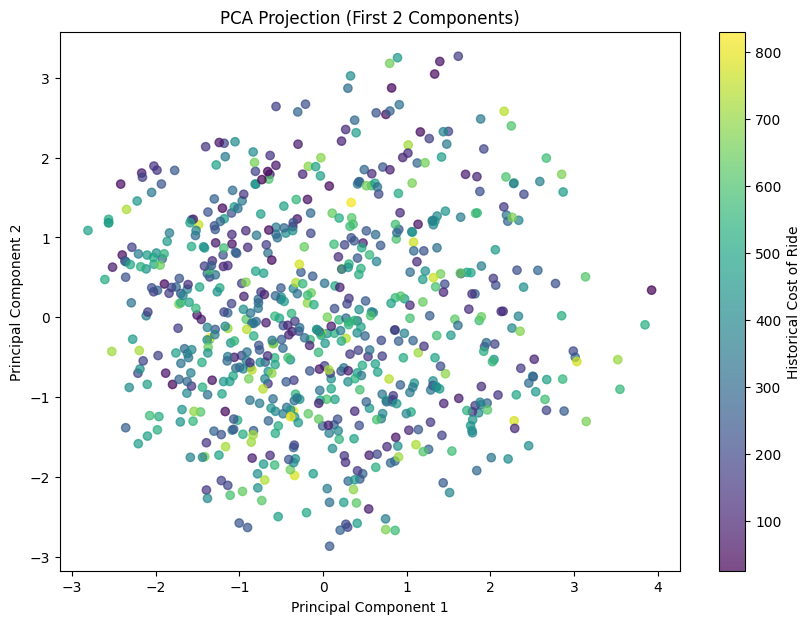

In [ ]:
# Apply PCA on scaled training data, transforming it into 2 components for visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Historical Cost of Ride')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (First 2 Components)')
plt.show()


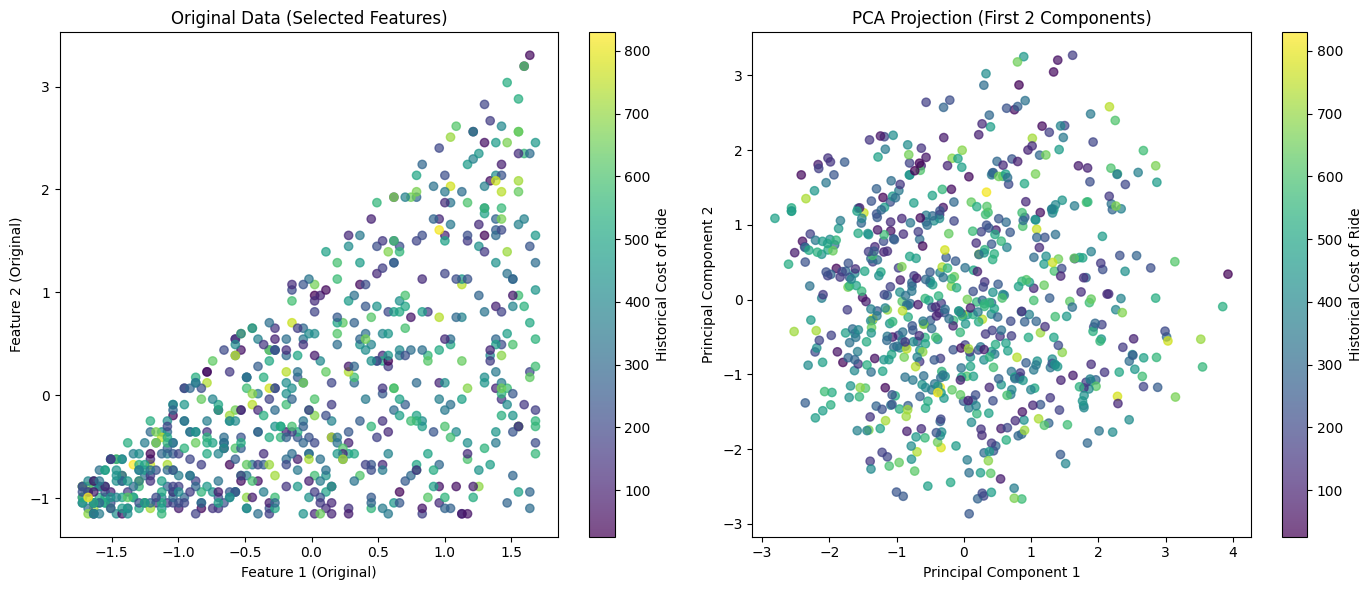

In [ ]:
import matplotlib.pyplot as plt

# Select two features from the scaled data for visualization of the original data
feature_1, feature_2 = X_train_scaled[:, 0], X_train_scaled[:, 1]

# Apply PCA on scaled training data, transforming it into 2 components for visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

# Create a figure with two subplots to visualize before and after PCA
plt.figure(figsize=(14, 6))

# Plot the original data (two selected features)
plt.subplot(1, 2, 1)
plt.scatter(feature_1, feature_2, c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Historical Cost of Ride')
plt.xlabel('Feature 1 (Original)')
plt.ylabel('Feature 2 (Original)')
plt.title('Original Data (Selected Features)')

# Plot the data after PCA transformation (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Historical Cost of Ride')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (First 2 Components)')

# Display the plots
plt.tight_layout()
plt.show()
